In [1]:
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim 
import matplotlib.pyplot as plt

In [2]:
# Stations indexed for one-hot encoding
pd.options.display.float_format = '{:.6f}'.format
mta = pd.read_csv('./cleaned/cleaned_2020.csv', parse_dates=['DATE'])
mta.set_index(['DATE'], inplace=True)
daily_mta = mta.loc[mta.index.unique()[0], :]
stations = daily_mta.loc[:, ('UNIT', 'STATION')]
stations.reset_index(inplace=True)
stations.drop(columns='DATE', inplace=True)
stations.insert(2, 'INDEX', range(0, len(stations)))
stations.set_index(['UNIT', 'STATION'], inplace=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(stations)
stations.to_csv('./stations.csv')

,,INDEX
UNIT,STATION,
R248,1 AVE,0
R180,103 ST,1
R314,103 ST,2
R191,103 ST,3
R208,103 ST-CORONA,4
R007,104 ST,5
R181,110 ST,6
R192,110 ST-CATHEDRL,7
R323,110 ST-CPN,8


,DATE,STATION,LATITUDE,LONGITUDE,ENTRIES_DIFF,EXITS_DIFF,LINENAME,UNIT,INDEX
97,2018-12-29,42 ST-GRD CNTRL,40.751849,-73.976945,166953,171422,4567S,R045,99
548,2018-12-30,42 ST-GRD CNTRL,40.751849,-73.976945,142344,147247,4567S,R045,99
999,2018-12-31,42 ST-GRD CNTRL,40.751849,-73.976945,235183,205643,4567S,R045,99
1450,2019-01-01,42 ST-GRD CNTRL,40.751849,-73.976945,112797,117396,4567S,R045,99
1901,2019-01-02,42 ST-GRD CNTRL,40.751849,-73.976945,343230,322642,4567S,R045,99
...,...,...,...,...,...,...,...,...,...
162921,2019-12-23,42 ST-GRD CNTRL,40.751849,-73.976945,286746,293971,4567S,R045,99
163376,2019-12-24,42 ST-GRD CNTRL,40.751849,-73.976945,196270,213543,4567S,R045,99
163831,2019-12-25,42 ST-GRD CNTRL,40.751849,-73.976945,87998,87115,4567S,R045,99
164286,2019-12-26,42 ST-GRD CNTRL,40.751849,-73.976945,233997,212063,4567S,R045,99


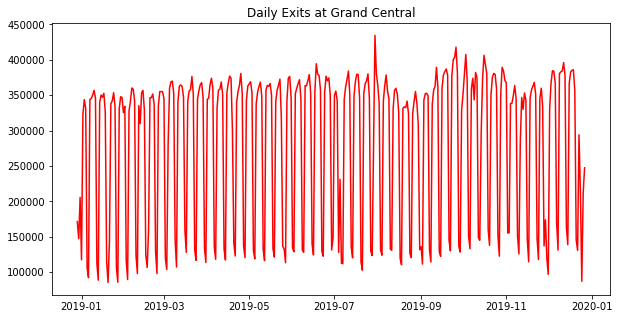

In [28]:
pd.options.display.float_format = '{:.6f}'.format

mta = pd.read_csv('./cleaned/cleaned_2019.csv', parse_dates=['DATE'])
indexed = pd.merge(mta, stations, how='left', left_on=['UNIT', 'STATION'], right_on=['UNIT', 'STATION'])
indexed = indexed[~indexed['INDEX'].isna()]
indexed = indexed.astype({'INDEX': 'int'})
indexed = indexed[indexed['INDEX']==99]
display(indexed)

plt.figure(figsize=(10,5))
plt.plot(indexed['DATE'], indexed['EXITS_DIFF'], '-r')
plt.title('Daily Exits at Grand Central')
plt.show()

In [136]:
class MTADataset(Dataset):
    def __init__(self):
        self.mta = pd.read_csv('./cleaned/cleaned_2019.csv', parse_dates=['DATE'])
        self.stations = pd.read_csv('./stations.csv')
        self.df = pd.merge(self.mta, self.stations, how='left', left_on=['UNIT', 'STATION'], right_on=['UNIT', 'STATION'])
        self.df = self.df[~self.df['INDEX'].isna()]
        self.df = self.df.astype({'INDEX': 'int'})
    
    def __len__(self):
        return len(self.df.index)
  
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        station_onehot = torch.zeros(len(self.stations.index))
        station_onehot[row['INDEX']] = 1
        weekday_onehot = torch.zeros(7)
        weekday_onehot[row['DATE'].dayofweek] = 1
        return torch.cat((station_onehot, weekday_onehot)), torch.Tensor([row['ENTRIES_DIFF']])

In [120]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(len(stations.index)+7, 1)
        
    def forward(self, x):
        return self.fc(x)

In [131]:
ds = MTADataset()
dataset_size = len(ds)
validation_size = int(0.2 * dataset_size)
train_ds, val_ds = torch.utils.data.random_split(ds, [dataset_size - validation_size, validation_size])
train_dl = DataLoader(train_ds, shuffle=True)
val_dl = DataLoader(val_ds, shuffle=True)

In [122]:
net = Net()

train_loss_list = []
val_loss_list = []

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(1): 
    print('epoch '+str(epoch))
    net.train()
    running_loss = 0.0
    for i, (onehot, count) in enumerate(train_dl):
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = net(torch.flatten(onehot))
        loss = criterion(output, count)
        loss.backward()
        optimizer.step()

        # print statistics
        train_loss_list.append(loss.item())
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

epoch 0


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1,  2000] loss: 2305514874.962
[1,  4000] loss: 2930613723.204
[1,  6000] loss: 2587995508.126
[1,  8000] loss: 2450009222.655
[1, 10000] loss: 2076230445.065
[1, 12000] loss: 2581172418.293
[1, 14000] loss: 2288174352.622
[1, 16000] loss: 1966061461.457
[1, 18000] loss: 2031925633.300
[1, 20000] loss: 1817562932.418
[1, 22000] loss: 1853428896.490
[1, 24000] loss: 1844424651.488
[1, 26000] loss: 2130030937.339
[1, 28000] loss: 2250309629.313
[1, 30000] loss: 1733901893.238
[1, 32000] loss: 1864169763.802
[1, 34000] loss: 1483316218.373
[1, 36000] loss: 1815841668.136
[1, 38000] loss: 1469704305.766
[1, 40000] loss: 1576614849.682
[1, 42000] loss: 1193130938.662
[1, 44000] loss: 1396447145.878
[1, 46000] loss: 1459131802.307
[1, 48000] loss: 1364337903.835
[1, 50000] loss: 1233862759.636
[1, 52000] loss: 1328877437.455
[1, 54000] loss: 1550701494.702
[1, 56000] loss: 1316054983.905
[1, 58000] loss: 1405824273.999
[1, 60000] loss: 1108614810.631
[1, 62000] loss: 743374832.554
[1, 64000

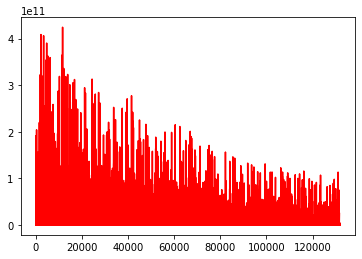

In [123]:
plt.plot(range(len(train_loss_list)), train_loss_list, '-r')
plt.show()

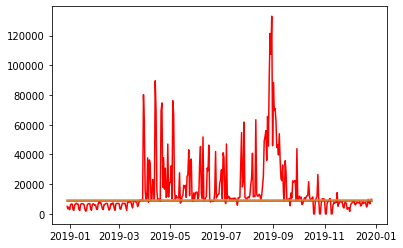

In [153]:
mta = pd.read_csv('./cleaned/cleaned_2019.csv', parse_dates=['DATE'])
indexed = pd.merge(mta, stations, how='left', left_on=['UNIT', 'STATION'], right_on=['UNIT', 'STATION'])
indexed = indexed[~indexed['INDEX'].isna()]
indexed = indexed.astype({'INDEX': 'int'})
indexed = indexed[indexed['INDEX']==354]
indexed['WEEKDAY'] = indexed['DATE'].apply(lambda x: x.dayofweek)
weekend = indexed[indexed['WEEKDAY']>=5]['ENTRIES_DIFF'].median()
weekday = indexed[indexed['WEEKDAY']<5]['ENTRIES_DIFF'].median()
plt.plot(indexed['DATE'], indexed['ENTRIES_DIFF'], '-r',
         indexed['DATE'], [weekend]*len(indexed.index),
         indexed['DATE'], [weekday]*len(indexed.index))
plt.show()

In [135]:
for name, param in net.named_parameters():
    print(name, param.data)

fc.weight tensor([[  4386.9248,   7635.0889,   8100.1846,  ..., -10805.2588,
         -11091.5010, -12264.2314]])
fc.bias tensor([21001.7363])
